#### **Introduction**

In traditional programming: we define explicit logic: `if x > 0: return x`

In **Deep Learning**: we define a structure (**neural network**) and an objective (minimize error)
and we let the computer figure out the parameters.

To do this efficiently, we need specialized tools. While NumPy is excellent for matrix math, it lacks two critical features required for Deep Learning:

1. **Hardware Acceleration**: The ability to run computations on GPUs (Graphics Processing Units) for massive parallelism.

2. **Automatic Differentiation** (Autograd): The ability to automatically calculate gradients (derivatives) required for optimization.

## **Mathematical Foundation - Tensors**
**DL is essentially linear algebra at scale**

I found this video helpful for intuitive understanding: [Tensors for Neural Networks - StatQuest Youtube Video](https://youtu.be/L35fFDpwIM4?si=zIAQHiRFqUV15LI2)

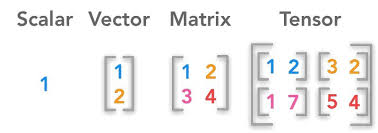

- **Scalar ($0$-D Tensor)**: A single number. $x \in \mathbb{R}$
  - Example: Magnitude, Loss value


- **Vector ($1$-D Tensor)**: An array of numbers. $\mathbf{x} \in \mathbb{R}^n$
  - Example: A single row of data, a bias term


- **Matrix ($2$-D Tensor)**: A 2D grid. $\mathbf{X} \in \mathbb{R}^{m \times n}$
   - Example: A grayscale image, a weight layer


- **Tensor ($n$-D Tensor)**: An $n$-dimensional array
  - Example: A batch of RGB images has shape
    - $[Batch, Height, Width, Channels]$ (common in TensorFlow)
    - $[Batch, Channels, Height, Width]$ (common in PyTorch).

#### **Computational Graph & Automatic Differentiation**
How do we train networks?

\We use **Backpropagation** : which is simply the Chain Rule of Calculus applied to a graph.

Consider the function: $f(x, y) = (x + y) \cdot z$

This can be viewed as a **directed acyclic graph** (DAG):
1. $a = x + y$
2. $Output = a \cdot z$

To find how a change in $x$ affects the output ($\frac{\partial Output}{\partial x}$), we traverse the graph backward:$$\frac{\partial Output}{\partial x} = \frac{\partial Output}{\partial a} \cdot \frac{\partial a}{\partial x}$$

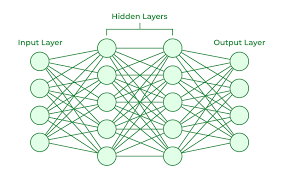

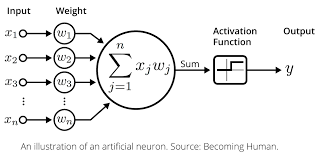

## **Frameworks: PyTorch and Tensorflow**

| Feature |**PyTorch** | **TensorFlow** |
| :--- | :--- | :--- |
| **Computational Graph** | <div style="width: 75px;">**Dynamic** (Define-by-Run). Flexible and easier to debug.</div> | <div style="width: 75px;">**Static** (Define-then-Run). Optimized for execution speed.</div> |
| **Ideal Use Case** | <div style="width: 75px;">Research, prototyping, custom models (LLMs).</div> | <div style="width: 75px;">Production, enterprise, mobile/edge deployment.</div> |
| **Ease of Debugging** | <div style="width: 75px;">**High.** Uses standard Python debuggers.</div> | <div style="width: 75px;">**Medium.** Debugging compiled graphs is trickier.</div> |
| **Deployment Tools** | <div style="width: 75px;">**TorchServe, TorchScript.** Good for server and cross-platform.</div> | <div style="width: 75px;">**TFX, TF Serving, TF Lite.** Industry-standard and mature.</div> |
| **Ecosystem** | <div style="width: 75px;">Research focus. Strong **Hugging Face** integration.</div> | <div style="width: 75px;">All-in-one. Built-in **TensorBoard** and comprehensive tools.</div> |
| **Performance (2025)** | <div style="width: 75px;">**Excellent.** PyTorch 2.0 (`torch.compile`) provides top speed.</div> | <div style="width: 75px;">**Excellent.** Optimized for large-scale training and **TPUs**.</div> |
| **High-Level API** | <div style="width: 75px;">Core `torch` module and libraries like `Lightning`.</div> | <div style="width: 75px;">**Keras.** Unified API that works across TF, PyTorch, and JAX.</div> |

## **Implementation**
(see the side-by-side comparison of PyTorch and Tensorflow)

In [1]:
import tensorflow as tf
import torch

In [2]:
#set seeds for reproducibility
#ensures random initialization of weights/data is consistent across runs
tf.random.set_seed(42)
torch.manual_seed(42)

In [3]:
#define raw python data
matrix_data = [[1.0, 2.0], [3.0, 4.0]] #2x2 matrix

#tensorflow
tf_matrix = tf.constant(matrix_data)
print(f"TF Matrix Shape: {tf_matrix.shape} | Type: {tf_matrix.dtype}")

#pytorch
pt_matrix = torch.tensor(matrix_data)
print(f"PyTorch Matrix Shape: {pt_matrix.shape} | Type: {pt_matrix.dtype}")

TF Matrix Shape: (2, 2) | Type: <dtype: 'float32'>
PyTorch Matrix Shape: torch.Size([2, 2]) | Type: torch.float32


### **Element-wise operations**
(handled intuitively by TensorFlow and PyTorch)

In [6]:
#multiplying our 2x2 matrix by a scalar
print("Original PyTorch Matrix:\n", pt_matrix)

#element-wise multiplication works intuitively like NumPy
print("\nElement-wise Multiplication ( multiplied by 2)")
print(f"PyTorch: {pt_matrix * 2}")
print(f"TensorFlow: {tf_matrix * 2}")

#element-wise addition
other_matrix = torch.tensor([[1.0, 1.0], [0.0, 0.0]])
print("\nElement-wise Addition")
print(f"PyTorch: {pt_matrix + other_matrix}")

Original PyTorch Matrix:
 tensor([[1., 2.],
        [3., 4.]])

Element-wise Multiplication ( multiplied by 2)
PyTorch: tensor([[2., 4.],
        [6., 8.]])
TensorFlow: [[2. 4.]
 [6. 8.]]

Element-wise Addition
PyTorch: tensor([[2., 3.],
        [3., 4.]])


### **Dot Product**
This is the engine of neural networks.

Unlike element-wise multiplication, this follows the rules of linear algebra.

To multiply matrix $A$ and matrix $B$, the number of columns in $A$ must match the number of rows in $B$.

Shape operation: $(M \times N) \cdot (N \times K) \rightarrow (M \times K)$

In Python, the `@` operator is often used as shorthand for matrix multiplication.

In [7]:
#create 2 matrices
#2 x 3
A_data = [[1, 2, 3],
          [4, 5, 6]]
#3 x 1
B_data = [[1],
          [0],
          [-1]]

#shape of reultant matrix: 2 x 1

pt_A = torch.tensor(A_data)
pt_B = torch.tensor(B_data)
tf_A = tf.constant(A_data)
tf_B = tf.constant(B_data)

print(f"Shape of A: {pt_A.shape}")
print(f"Shape of B: {pt_B.shape}")


#use the matmul function or the @ operator
print("\n--- Matrix Multiplication Results ---")
# Row 1: (1*1) + (2*0) + (3*-1) = -2
# Row 2: (4*1) + (5*0) + (6*-1) = -2
print(f"PyTorch (using @):\n {pt_A @ pt_B}")
print(f"TensorFlow (using matmul):\n {tf.matmul(tf_A, tf_B)}")

Shape of A: torch.Size([2, 3])
Shape of B: torch.Size([3, 1])

--- Matrix Multiplication Results ---
PyTorch (using @):
 tensor([[-2],
        [-2]])
TensorFlow (using matmul):
 [[-2]
 [-2]]


### **Broadcasting**
Broadcasting is a powerful feature borrowed from NumPy. It allows frameworks to perform mathematical operations on tensors with different shapes by implicitly "stretching" the smaller tensor to match the larger one.

**Rule of Broadcasting**

Two tensor dimensions are compatible if:
1. They are equal, OR
2. One of the dimensions is 1.

The framework looks at the dimensions from right to left. If a dimension is 1, it stretches it to match the other tensor's dimension by copying the data.

**Visualizing broadcasting**

Imagine adding a vector `[10, 20, 30]` to a $2 \times 3$ matrix
- vector has shape $(3,)$ or $(1, 3)$
- matrix has shape $(2, 3)$

Because the vector has a dimension of 1 where the matrix has a 2, the vector is implicitly duplicated downwards to match the matrix rows before addition occurs.

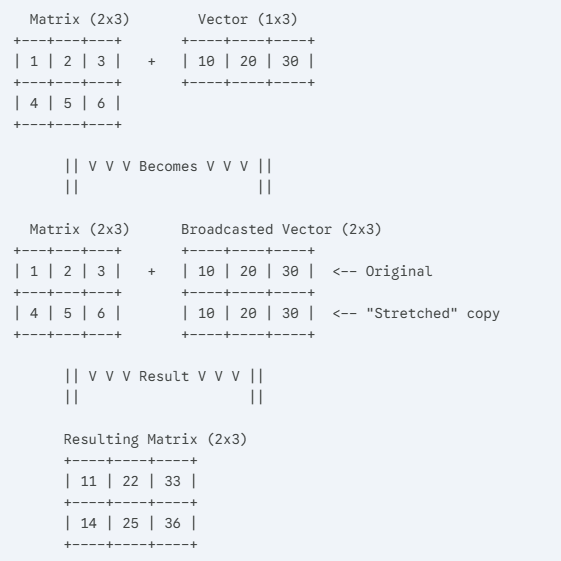


In [9]:
#setup the data from the diagram
matrix_data = [[1, 2, 3], [4, 5, 6]]
vector_data = [10, 20, 30]

# PyTorch implementation
pt_matrix = torch.tensor(matrix_data)
pt_vector = torch.tensor(vector_data)

print(f"Matrix Shape: {pt_matrix.shape}")
# Note: A 1D tensor of shape (3,) is treated as (1, 3) for broadcasting here
print(f"Vector Shape: {pt_vector.shape}")

#addition works because of broadcasting rules
broadcasted_sum = pt_matrix + pt_vector

print("\n Broadcasting Result (PyTorch)")
print(broadcasted_sum)

# TensorFlow implementation (identical behavior)
tf_matrix = tf.constant(matrix_data)
tf_vector = tf.constant(vector_data)
print("\n Broadcasting Result (TensorFlow)")
print(tf_matrix + tf_vector)

Matrix Shape: torch.Size([2, 3])
Vector Shape: torch.Size([3])

 Broadcasting Result (PyTorch)
tensor([[11, 22, 33],
        [14, 25, 36]])

 Broadcasting Result (TensorFlow)
tf.Tensor(
[[11 22 33]
 [14 25 36]], shape=(2, 3), dtype=int32)
